## Exploratory Data Analysis

In [1]:
library(ggplot2)
library(dplyr)

loan = read.csv2("loan_train_mod.csv", sep= ",", row.names= 1)
loan = loan %>% select(default, reason, amount, annual_income, interest, term, employment, credit_bal, credit_ratio,
                       v5, v6)
loan = loan %>% na.omit()

loan$amount = as.numeric(loan$amount)
loan$income = as.numeric(as.character(loan$annual_income))
loan$interest = as.numeric(as.character(loan$interest))
loan$credit_bal = as.numeric(loan$credit_bal)
loan$credit_ratio = as.numeric(as.character(loan$credit_ratio))
loan$v5 = as.numeric(as.character(loan$v5))
loan$v6 = as.numeric(as.character(loan$v6))
loan$term = as.numeric(gsub(pattern = " yrs", replacement = "", x = loan$term))
loan$employment = factor(loan$employment, levels = c("< 1", 1:9, "10+"))
loan = select(loan, -annual_income)

clean = loan
clean = loan %>% filter(credit_bal <= 90000 & v5 <= 12000)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



### Independent Variables

Warning message:
"position_stack requires non-overlapping x intervals"Warning message:
"position_stack requires non-overlapping x intervals"

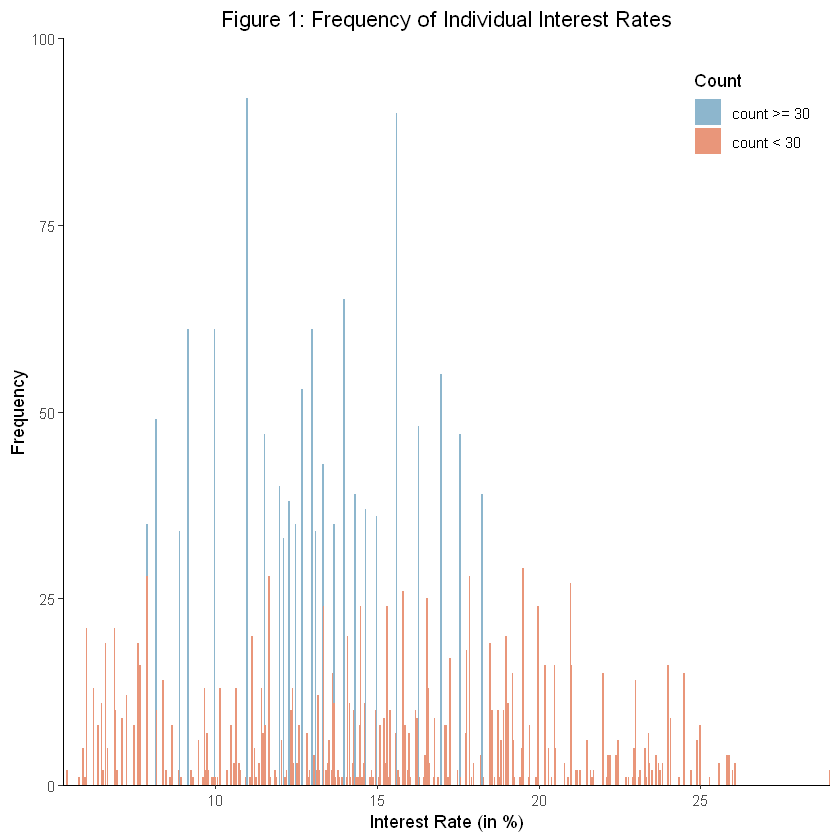

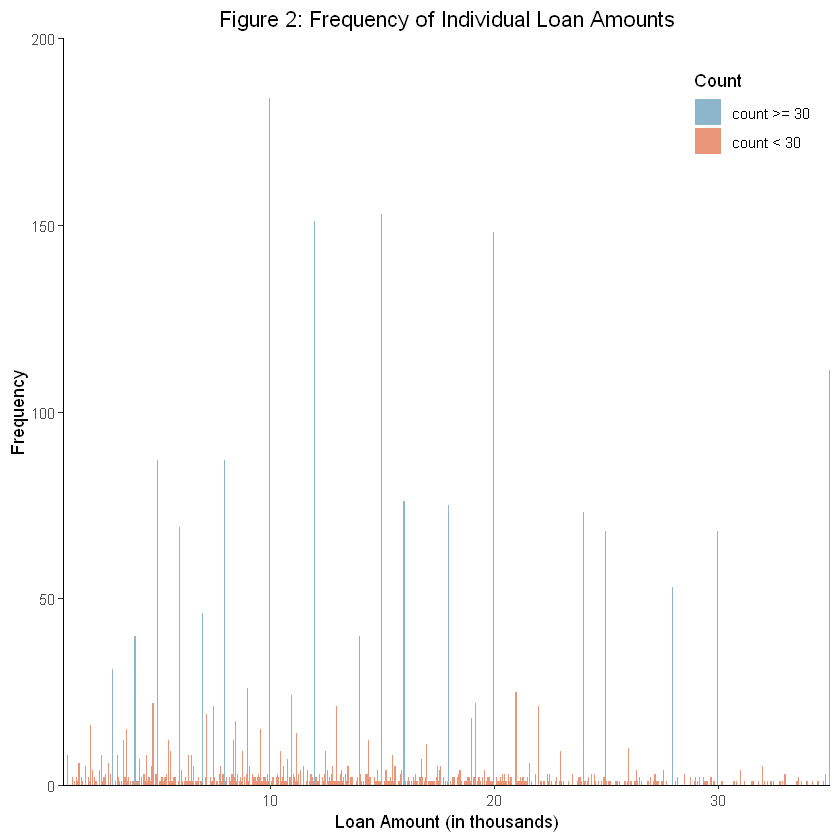

In [2]:
# interest rate values frequency

loan %>% group_by(interest) %>% summarise(count = n()) %>% ggplot() +
    geom_col(aes(x = interest, y = count, fill = count >= 30), width = 0.05) +
# fill colors
    scale_fill_manual(values = c("darksalmon", "lightskyblue3"), labels = c("count < 30", "count >= 30"),
                     guide = guide_legend(reverse=TRUE)) +
# theme
    theme_classic() + theme(plot.title = element_text(hjust = 0.5), legend.position = c(0.9, 0.9)) +
# labels
    labs(x = "Interest Rate (in %)", y = "Frequency",
         title = "Figure 1: Frequency of Individual Interest Rates", fill = "Count") + 
# scales
    scale_x_continuous(expand = c(0,0)) +
    scale_y_continuous(expand = c(0,0), limits = c(0, 100))

# loan amount values frequency

loan %>% group_by(amount) %>% summarise(count = n()) %>% ggplot() +
    geom_col(aes(x = amount, y = count, fill = count >= 30), width = 50) +
# fill colors
    scale_fill_manual(values = c("darksalmon", "lightskyblue3"), labels = c("count < 30", "count >= 30"),
                     guide = guide_legend(reverse=TRUE)) +
# theme
    theme_classic() + theme(plot.title = element_text(hjust = 0.5), legend.position = c(0.9, 0.9)) +
# labels
    labs(x = "Loan Amount (in thousands)", y = "Frequency",
         title = "Figure 2: Frequency of Individual Loan Amounts", fill = "Count") + 
# scales
    scale_x_continuous(expand = c(0,0), labels = seq(0, 40, 10)) +
    scale_y_continuous(expand = c(0,0), limits = c(0, 200))

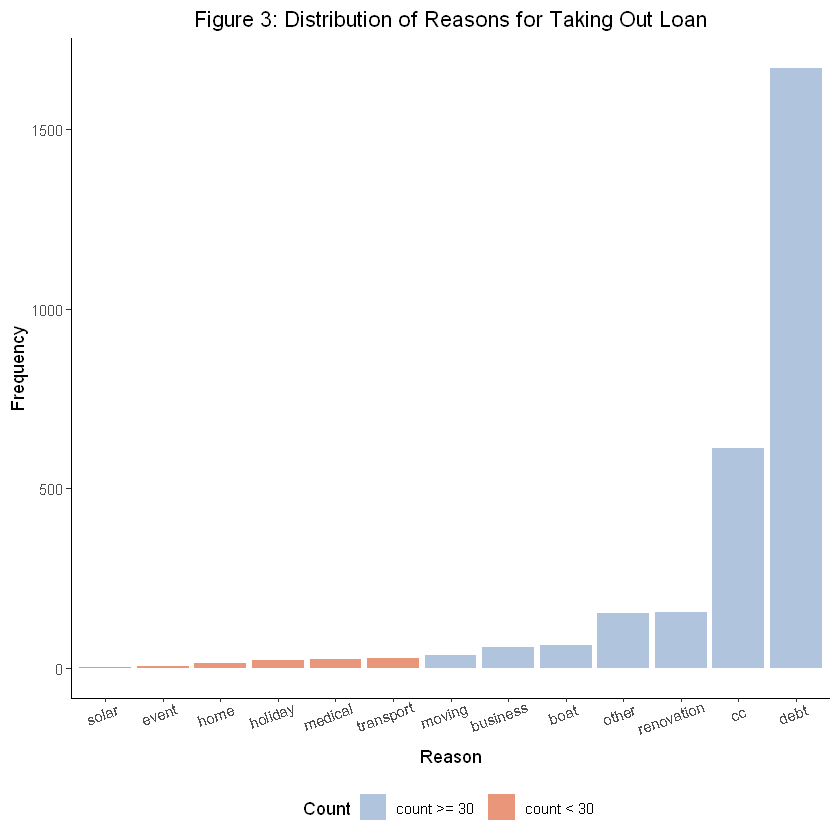

In [3]:
loan %>% group_by(reason) %>% summarise(count = n()) %>% ggplot() +
    geom_col(aes(x = reorder(reason, count), y = count, fill = count < 30)) +
# fill colors
    scale_fill_manual(values = c("lightsteelblue", "darksalmon"),
                     labels = c("count >= 30", "count < 30")) +
# theme
    theme_classic() + theme(axis.text.x = element_text(size = 9, angle = 20, hjust = 0.7),
                            plot.title = element_text(hjust = 0.5),
                           legend.position = "bottom") +
# labels
    labs(x = "Reason", y = "Frequency", fill = "Count",
         title = "Figure 3: Distribution of Reasons for Taking Out Loan")

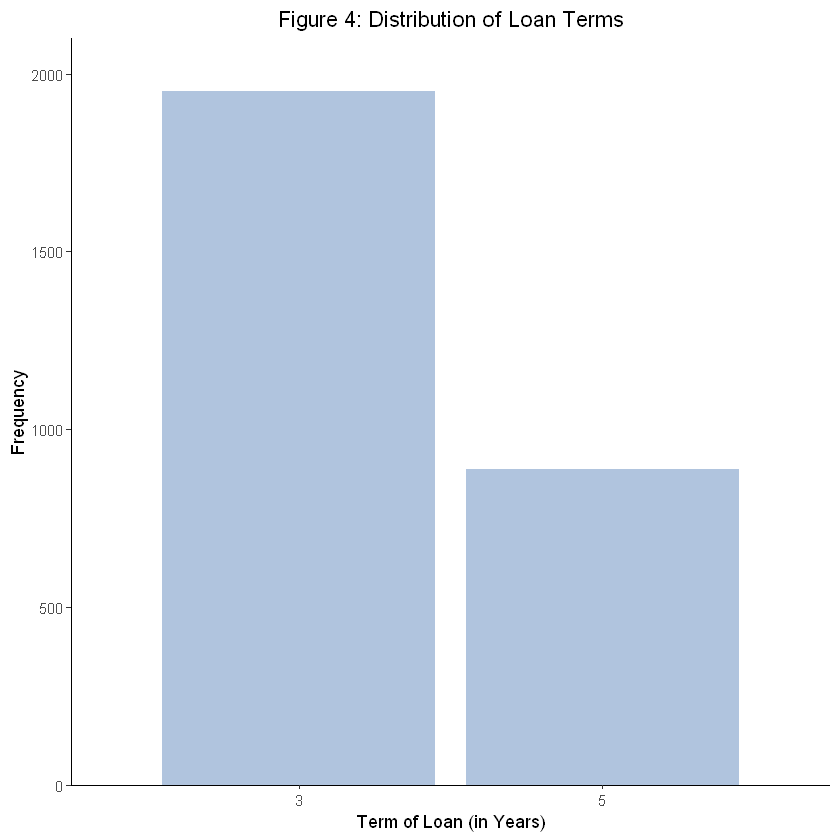

In [4]:
loan %>% group_by(term) %>% summarise(count = n()) %>% ggplot() +
    geom_col(aes(x = term, y = count), fill = "lightsteelblue") +
# theme
    theme_classic() + theme(plot.title = element_text(hjust = 0.5)) +
# labels
    labs(x = "Term of Loan (in Years)", y = "Frequency", fill = "Count",
         title = "Figure 4: Distribution of Loan Terms") +
# scales
    scale_x_continuous(expand = c(0, 0.6), breaks = c(3, 5), labels = c("3", "5")) +
    scale_y_continuous(expand = c(0, 0), limits = c(0, 2100))

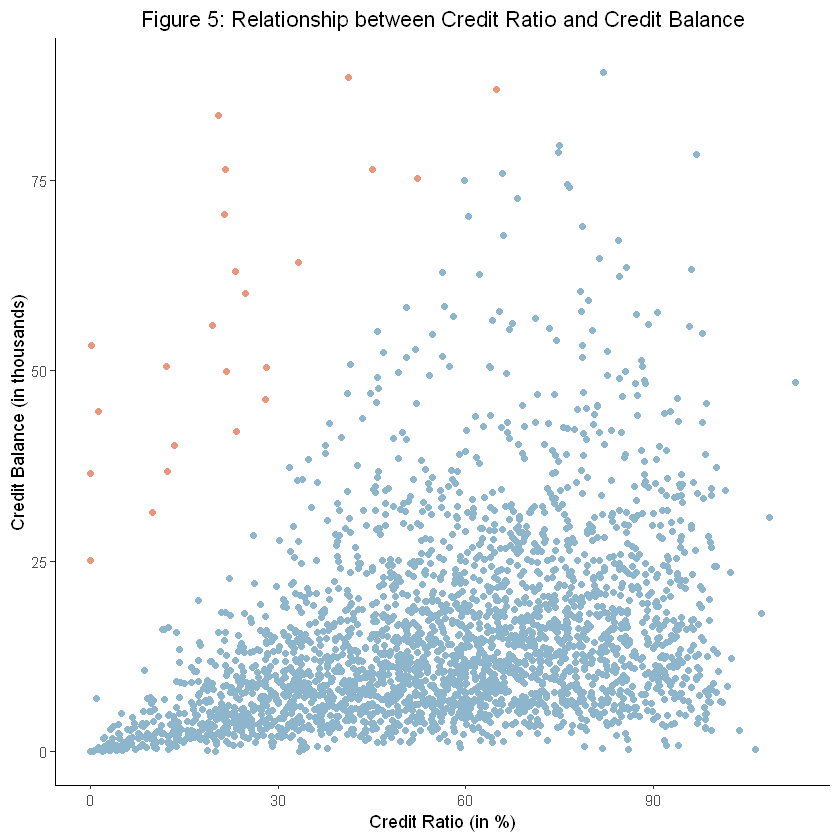

In [5]:
# Credit ratio vs. credit balance

clean %>% ggplot() +
    geom_point(aes(x = credit_ratio, y = credit_bal, col = credit_ratio * 1200 + 9000 < credit_bal),
               show.legend = FALSE) +
# fill colors
    scale_color_manual(values = c("lightskyblue3", "darksalmon")) +
# theme
    theme_classic() + theme(plot.title = element_text(hjust = 0.5)) +
# labels
    labs(x = "Credit Ratio (in %)", y = "Credit Balance (in thousands)",
         title = "Figure 5: Relationship between Credit Ratio and Credit Balance") + 
# scales
    scale_y_continuous(labels = seq(0, 100, 25))
#    stat_ellipse(aes(credit_ratio, credit_bal, col = credit_ratio * 1200 + 19000 >= credit_bal),
#                 geom = "path", position = "identity", size = .8,
#                 level = 0.95, segments = 50, show.legend = FALSE, inherit.aes = TRUE)

Warning message:
"Removed 6 rows containing missing values (geom_point)."

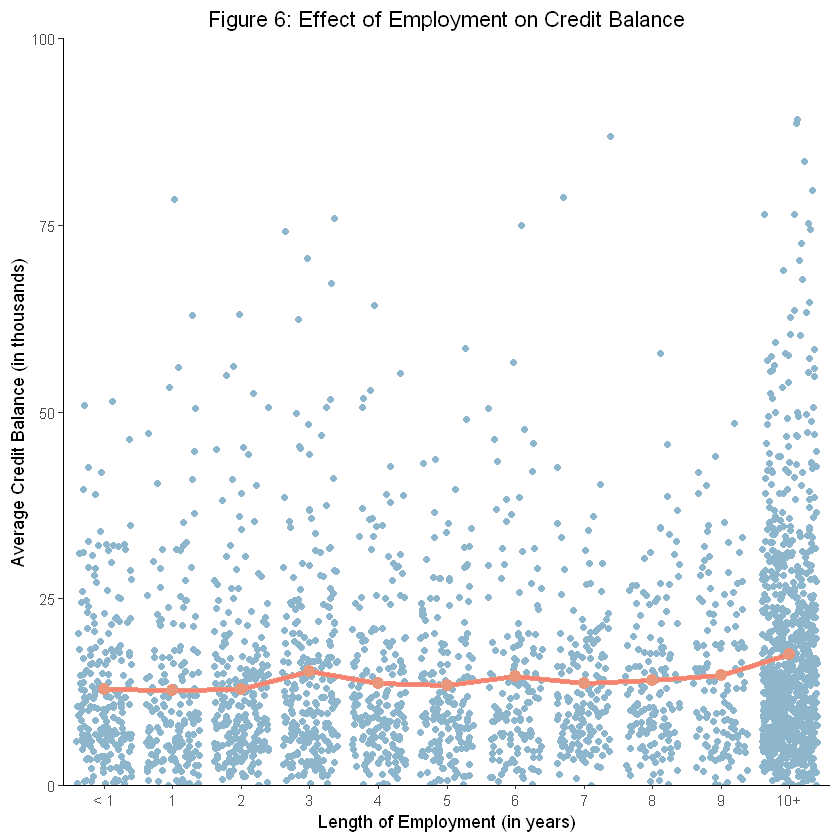

In [20]:
#loan %>% group_by(employment) %>% summarise(credit_bal = mean(credit_bal)) %>% ggplot() +
#    geom_col(aes(x = employment, y = credit_bal), fill = "lightsteelblue") +
## theme
#    theme_classic() + theme(plot.title = element_text(hjust = 0.5)) +
## labels
#    labs(title = "Effect of Employment on Credit Balance", x = "Length of Employment (in years)",
#         y = "Average Credit Balance (in thousands)") +
## scales
#    scale_y_continuous(expand = c(0, 0), labels = seq(0, 15, 5), breaks = seq(0, 15000, 5000))

df = clean %>% group_by(employment) %>% summarise(credit_bal = mean(credit_bal))
clean %>% ggplot(aes(x = employment, y = credit_bal)) +
    geom_jitter(col = "lightskyblue3") +
# theme
    theme_classic() + theme(plot.title = element_text(hjust = 0.5)) +
# labels
    labs(title = "Figure 6: Effect of Employment on Credit Balance", x = "Length of Employment (in years)",
         y = "Average Credit Balance (in thousands)") +
    geom_line(data = df, col = "darksalmon", group = 1, size = 1.5) +
    geom_line(data = df, col = "salmon", group = 1, size = 1) +
    geom_point(data = df, col = "darksalmon", size = 3) +
# scales
    scale_y_continuous(expand = c(0, 0), limits = c(0, 100000), labels = seq(0, 100, 25))

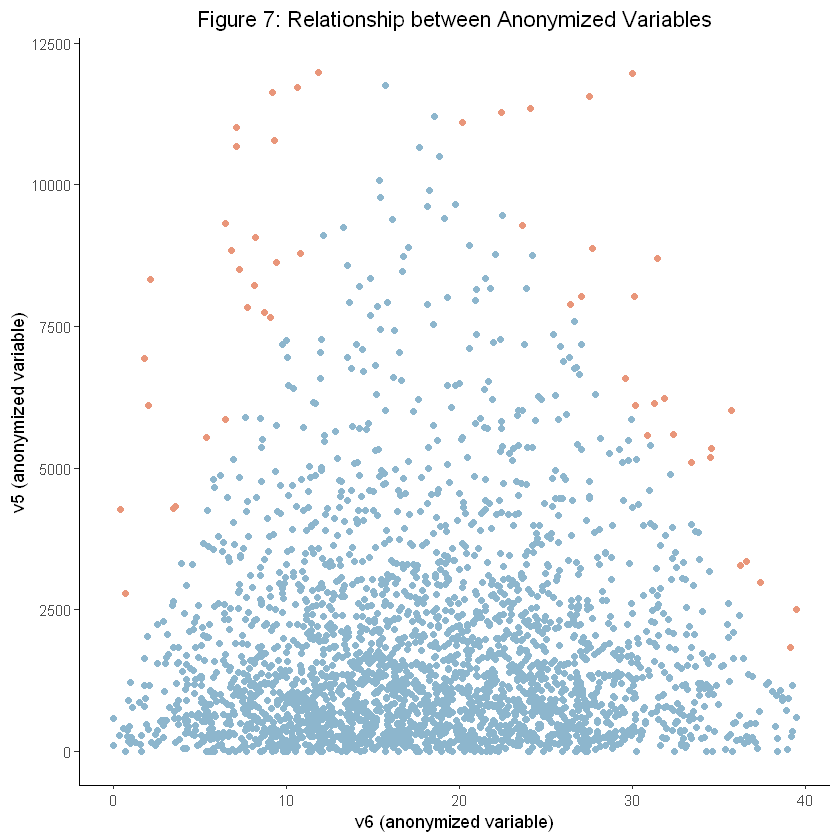

In [7]:
# v6 vs. v5

clean %>% ggplot() +
    geom_point(aes(x = v6, y = v5, col = v5 <= v6 * 700 + 1200 & v5 <= v6 * -500 + 21000), show.legend = FALSE) + 
# fill colors
    scale_color_manual(values = c("darksalmon", "lightskyblue3")) +
# theme
    theme_classic() + theme(plot.title = element_text(hjust = 0.5)) +
# labels
    labs(title = "Figure 7: Relationship between Anonymized Variables", x = "v6 (anonymized variable)",
         y = "v5 (anonymized variable)")

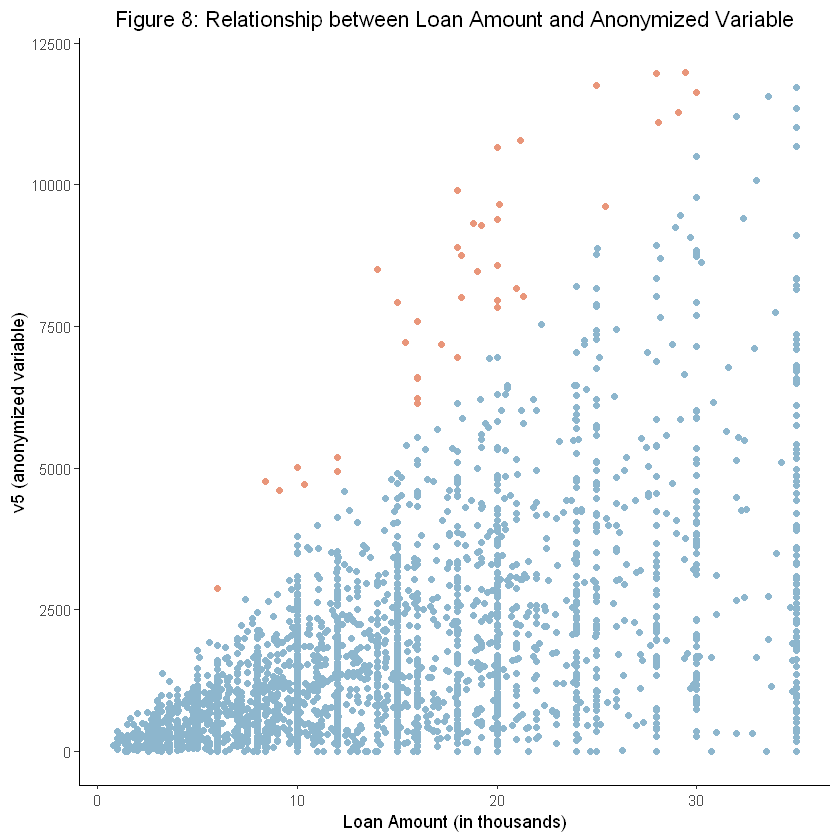

In [8]:
# v5 vs loan amount

clean %>% ggplot() +
    geom_point(aes(x = amount, y = v5, col = v5 > 500 + .35 * amount), show.legend = F) + 
# fill colors
    scale_color_manual(values = c("lightskyblue3", "darksalmon")) +
# theme
    theme_classic() + theme(plot.title = element_text(hjust = 0.5)) +
# labels
    labs(title = "Figure 8: Relationship between Loan Amount and Anonymized Variable",
         x = "Loan Amount (in thousands)", y = "v5 (anonymized variable)") +
# scales
    scale_x_continuous(labels = seq(0, 40, 10), breaks = seq(0, 40000, 10000))

### Relationship to Defaults

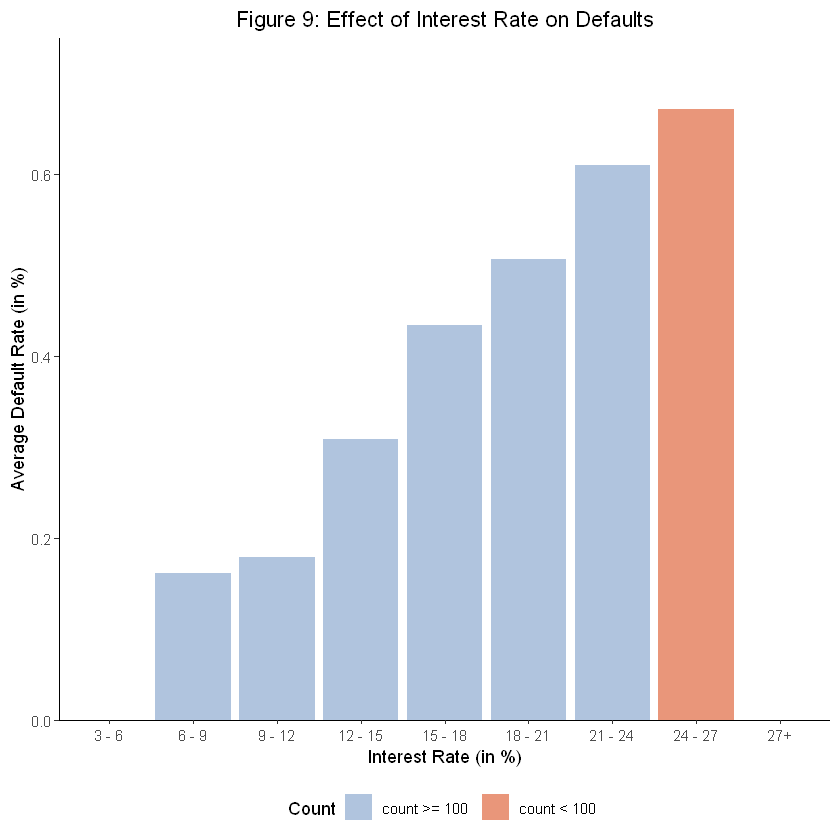

In [9]:
# Interest

loan$interest_cat = loan$interest %>% cut(breaks = seq(0, 33, 3)) # grouped by 3s

loan %>% group_by(interest_cat) %>% summarise(count = n() >= 100, default = mean(default)) %>% ggplot() +
    geom_col(aes(x = interest_cat, y = default, fill = count)) +
# fill colors
    scale_fill_manual(values = c("darksalmon", "lightsteelblue"), guide = guide_legend(reverse=TRUE),
                     labels = c("count < 100", "count >= 100")) +
# theme
    theme_classic() + theme(plot.title = element_text(hjust = 0.5), legend.position = "bottom") +
# labels
    labs(title = "Figure 9: Effect of Interest Rate on Defaults", x = "Interest Rate (in %)",
         y = "Average Default Rate (in %)", fill = "Count") +
# scales
    scale_x_discrete(expand = c(0, 0.6), labels = c("3 - 6", "6 - 9", "9 - 12", "12 - 15", "15 - 18", "18 - 21",
                                                    "21 - 24", "24 - 27", "27+")) +
    scale_y_continuous(expand = c(0, 0), limits = c(0, .75))

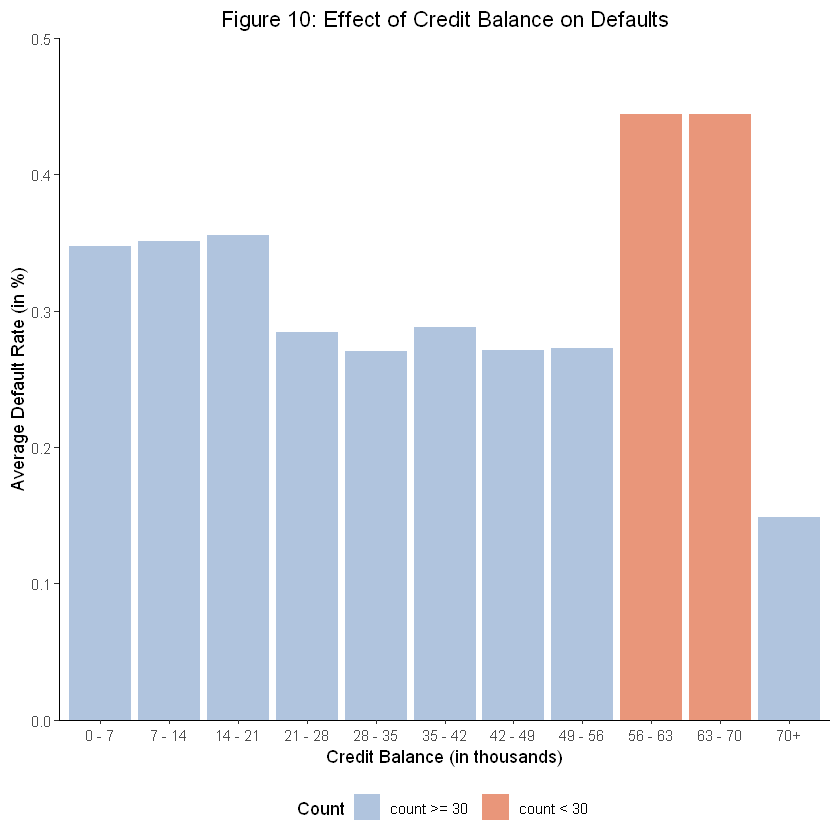

In [10]:
# Credit Balance

loan$credit_bal_cat = loan$credit_bal %>% cut(breaks = c(seq(-.0001, 70000, 7000), 300000))

loan %>% group_by(credit_bal_cat) %>% summarise(count = n() >= 30, default = mean(default)) %>% ggplot() +
    geom_col(aes(x = credit_bal_cat, y = default, fill = count)) +
# fill colors
    scale_fill_manual(values = c("darksalmon", "lightsteelblue"), guide = guide_legend(reverse=TRUE),
                     labels = c("count < 30", "count >= 30")) +
# theme
    theme_classic() + theme(plot.title = element_text(hjust = 0.5),
                           legend.position = "bottom") +
# labels
    labs(title = "Figure 10: Effect of Credit Balance on Defaults", x = "Credit Balance (in thousands)",
         y = "Average Default Rate (in %)", fill = "Count") +
# scales
    scale_x_discrete(expand = c(0, .6), labels = c("0 - 7", "7 - 14", "14 - 21", "21 - 28", "28 - 35", "35 - 42",
                                                  "42 - 49", "49 - 56", "56 - 63", "63 - 70", "70+")) +
    scale_y_continuous(expand = c(0, 0), limits = c(0, .5))

#x = loan %>% filter(credit_bal >= 70000)
#x %>% group_by(high_credit_bal = credit_bal > 100000) %>% summarise(count = n(), default = mean(default))

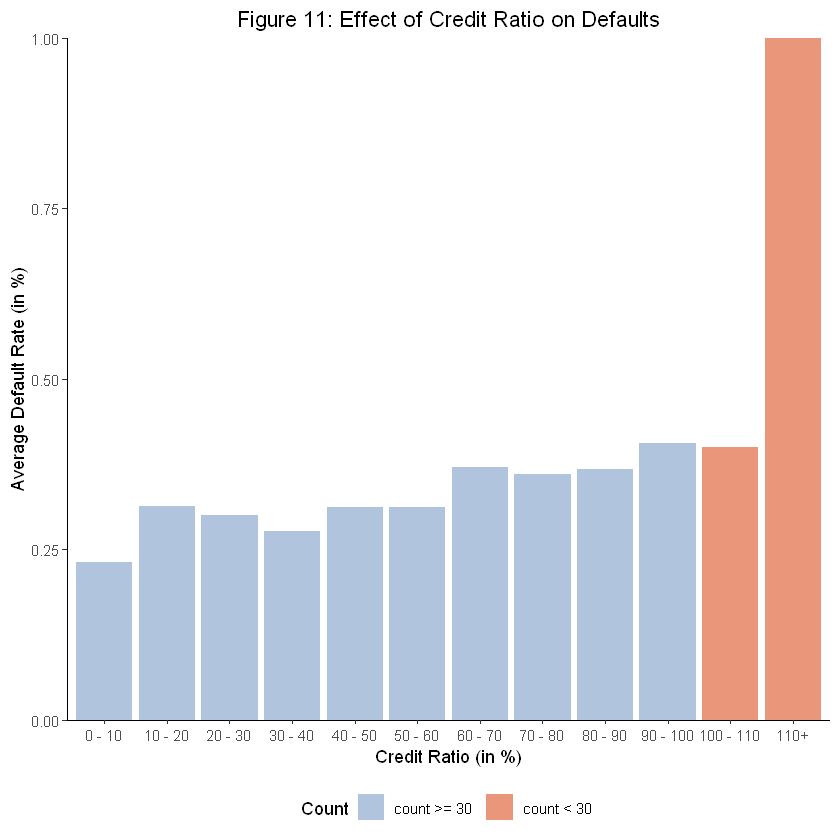

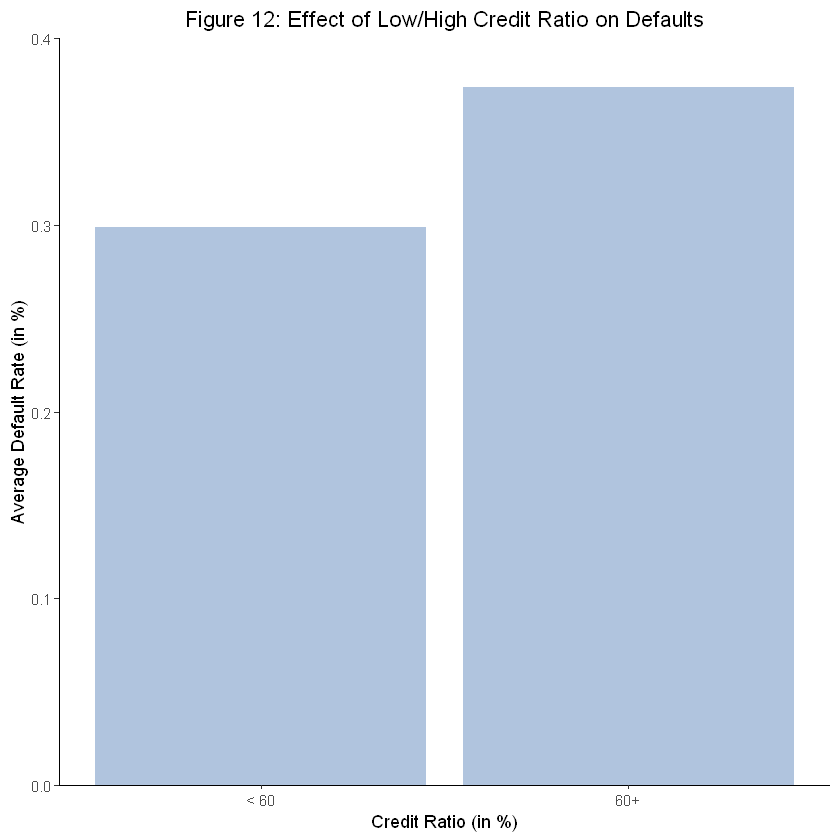

In [11]:
# Credit Ratio

loan$credit_ratio_cat = loan$credit_ratio %>% cut(breaks = seq(-0.00001, 120, 10))

loan %>% group_by(credit_ratio_cat) %>% summarise(count = n() >= 30, default = mean(default)) %>% ggplot() +
    geom_col(aes(x = credit_ratio_cat, y = default, fill = count)) +
# fill colors
    scale_fill_manual(values = c("darksalmon", "lightsteelblue"), guide = guide_legend(reverse=TRUE),
                     labels = c("count < 30", "count >= 30")) +
# theme
    theme_classic() + theme(plot.title = element_text(hjust = 0.5), legend.position = "bottom") +
# labels
    labs(title = "Figure 11: Effect of Credit Ratio on Defaults", x = "Credit Ratio (in %)",
         y = "Average Default Rate (in %)", fill = "Count") +
# scales
    scale_x_discrete(expand = c(0, .6), labels = c("0 - 10", "10 - 20", "20 - 30", "30 - 40", "40 - 50", "50 - 60",
                                                  "60 - 70", "70 - 80", "80 - 90", "90 - 100", "100 - 110", "110+")) +
    scale_y_continuous(expand = c(0, 0), limits = c(0, 1))

loan %>% group_by(ratio = credit_ratio >= 60) %>% summarise(default = mean(default)) %>% ggplot() +
    geom_col(aes(x = ratio, y = default), fill = "lightsteelblue") +
# theme
    theme_classic() + theme(plot.title = element_text(hjust = 0.5)) +
# labels
    labs(title = "Figure 12: Effect of Low/High Credit Ratio on Defaults", x = "Credit Ratio (in %)",
         y = "Average Default Rate (in %)", fill = "Count") +
# scales
    scale_x_discrete(expand = c(0, .55), labels = c("< 60", "60+")) +
    scale_y_continuous(expand = c(0, 0), limits = c(0, .4))

high_v5,count,default
FALSE,779,0.3658537
TRUE,820,0.4207317


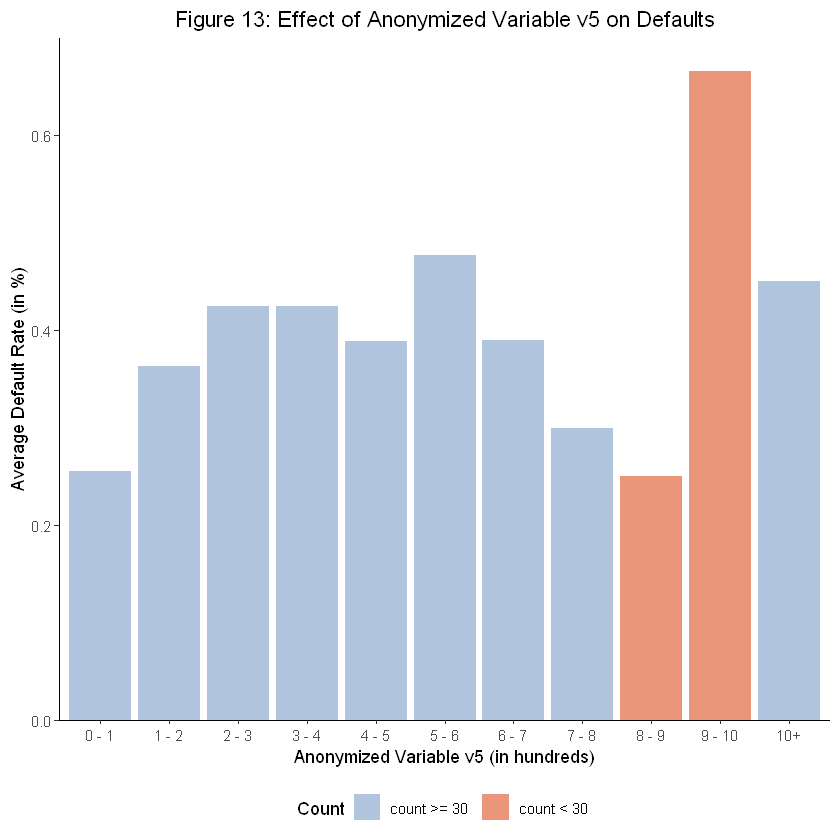

In [23]:
#v5

loan$v5_cat = loan$v5 %>% cut(breaks = c(seq(-.000001, 10000, 1000), 21000))

loan %>% group_by(v5_cat) %>% summarise(count = n() >= 30, default = mean(default)) %>% ggplot() +
    geom_col(aes(x = v5_cat, y = default, fill = count)) +
# fill colors
    scale_fill_manual(values = c("darksalmon", "lightsteelblue"), guide = guide_legend(reverse=TRUE),
                     labels = c("count < 30", "count >= 30")) +
# theme
    theme_classic() + theme(plot.title = element_text(hjust = 0.5), legend.position = "bottom") +
# labels
    labs(title = "Figure 13: Effect of Anonymized Variable v5 on Defaults",
         x = "Anonymized Variable v5 (in hundreds)", y = "Average Default Rate (in %)", fill = "Count") +
# scales
    scale_x_discrete(expand = c(0, .6), labels = c("0 - 1", "1 - 2", "2 - 3", "3 - 4", "4 - 5", "5 - 6", "6 - 7", "7 - 8",
                                                  "8 - 9", "9 - 10", "10+")) +
    scale_y_continuous(expand = c(0, 0), limits = c(0, .7))

x = loan %>% filter(v5 >= 1000)
x %>% group_by(high_v5 = v5 > 2200) %>% summarise(count = n(), default = mean(default))

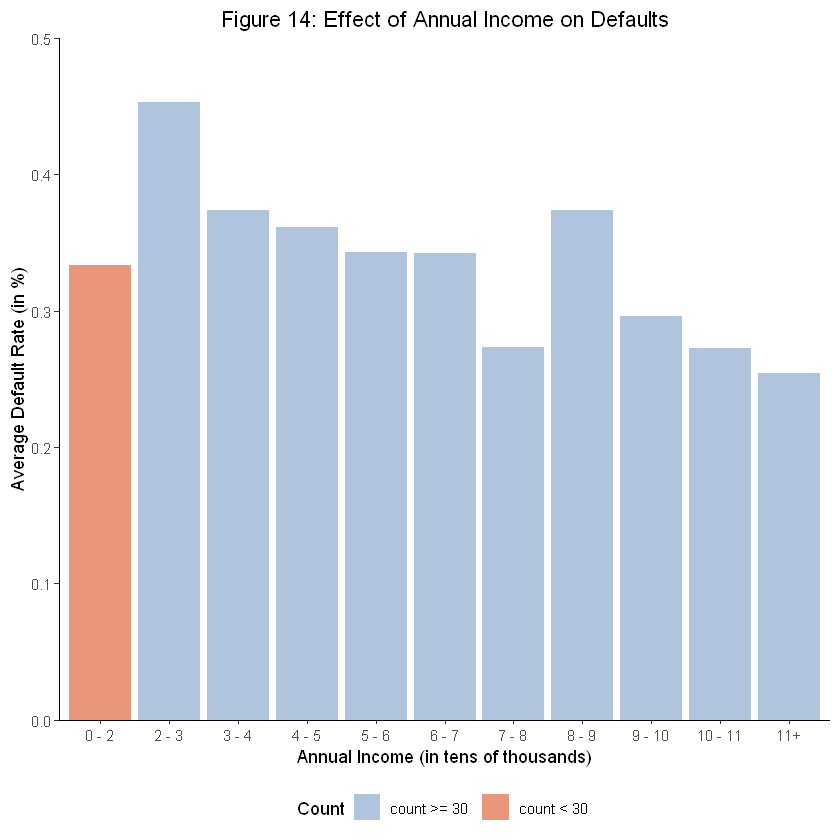

In [13]:
#income

loan$income_cat = loan$income %>% cut(breaks = c(0, seq(20000, 110000, 10000), 1000000))

loan %>% na.omit() %>% group_by(income_cat) %>% summarise(count = n() >= 100, default = mean(default)) %>% ggplot() +
    geom_col(aes(x = income_cat, y = default, fill = count)) +
# fill colors
    scale_fill_manual(values = c("darksalmon", "lightsteelblue"), guide = guide_legend(reverse=TRUE),
                     labels = c("count < 30", "count >= 30")) +
# theme
    theme_classic() + theme(plot.title = element_text(hjust = 0.5), legend.position = "bottom") +
# labels
    labs(title = "Figure 14: Effect of Annual Income on Defaults", x = "Annual Income (in tens of thousands)",
         y = "Average Default Rate (in %)", fill = "Count") +
# scales
    scale_x_discrete(expand = c(0, .6), labels = c("0 - 2", "2 - 3", "3 - 4", "4 - 5", "5 - 6", "6 - 7",
                                                   "7 - 8", "8 - 9", "9 - 10", "10 - 11", "11+")) +
    scale_y_continuous(expand = c(0, 0), limits = c(0, .5))

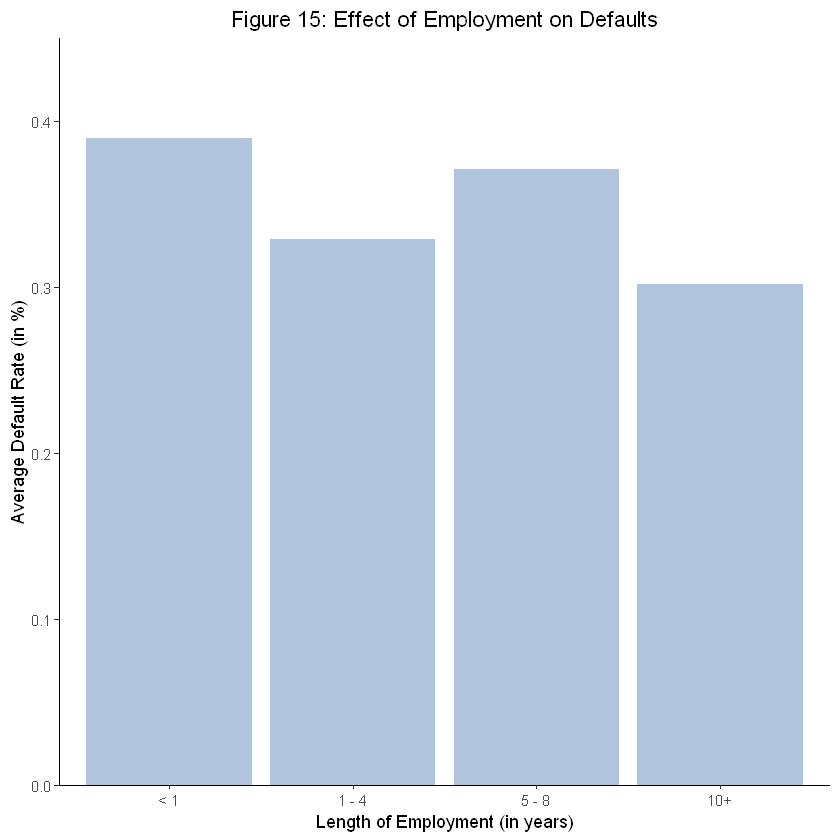

In [14]:
# Employment
loan$employment_n = as.numeric(loan$employment)
loan$employment_cat = loan$employment_n %>% cut(breaks = c(0, 1, 5, 9, 11), labels = c("< 1", "1 - 4", "5 - 8", "10+"))
loan = select(loan, -employment_n)

loan %>% group_by(employment_cat) %>% summarise(default = mean(default)) %>% ggplot() +
    geom_col(aes(x = employment_cat,y = default), fill = "lightsteelblue") +
# theme
    theme_classic() + theme(plot.title = element_text(hjust = 0.5)) +
# labels
    labs(title = "Figure 15: Effect of Employment on Defaults", x = "Length of Employment (in years)",
         y = "Average Default Rate (in %)") +
# scales
    scale_y_continuous(expand = c(0, 0), limits = c(0, .45))

## Modeling

In [15]:
# New factors

library(mltools)

loan$reasons = "all others"
loan$reasons[loan$reason == "business"] = "business"
loan$reasons[loan$reason == "renovation"] = "renovation"
loan$reasons[loan$reason == "cc"] = "cc"
loan$reasons[loan$reason == "debt"] = "debt"

loan$employments = as.numeric(loan$employment) %>%
    cut(breaks = c(0, 1, 5, 9, 11), labels = c("< 1", "1 - 4", "5 - 8", "> 8"))
loan$employments_1 = as.numeric(loan$employment) %>%
    cut(breaks = c(0, 3, 10, 11), labels = c("< 3", "3 - 9", "10+"))

loan$high_ratio = loan$credit_ratio >= 60
loan$high_bal = loan$credit_bal >= 15000

avg = mean(loan$default)
loan$random = sample(0:1, nrow(loan), replace = TRUE, prob = c(1 - avg, avg))

Warning message:
"package 'mltools' was built under R version 3.6.3"

In [16]:
# Defining the functions

library(boot)
library(ModelMetrics)

# Weighted accuracy function
weighted_accuracy <- function(truth, preds, weight1 = 0.93, weight0 = 0.07) {

    # Takes in the true y values and raw predictions, as well as weights
    # Returns 0.93/norm * (# accurate preds where truth = 1) + 0.07/norm * (# accurate preds where truth = 0)
    # where norm = 0.93 * (# truth = 1) + 0.07 * (# truth = 0)

    bin_preds = preds > 0.5 # binarize predictions
    ind1 = which(truth == 1)
    ind0 = which(truth == 0)
    sum_weights = weight1 * length(ind1) + weight0 * length(ind0) # normalize by this so weights sum to 1
    weighted_acc = weight1/sum_weights * sum(truth[ind1] == bin_preds[ind1]) +
    weight0/sum_weights * sum(truth[ind0] == bin_preds[ind0])
    return(weighted_acc)
}

predictive_accuracy <- function(truth, preds) {
    bin_preds = preds > 0.5
    pred_acc = mean(truth == bin_preds)
    return(pred_acc)
}

# AUC function
AUC <- function(truth, preds) {
    return(auc(truth, preds))
}

add <- function(name, formula) {
    string = paste("model_", name, sep = "")
    
    weighted = cv.glm(loan, get(string), cost = weighted_accuracy, K = 5)$delta[2]
    pred_acc = cv.glm(loan, get(string), cost = predictive_accuracy, K = 5)$delta[2]
    auc = cv.glm(loan, get(string), cost = AUC, K = 5)$delta[2]
    
    models <<- rbind(models, c(formula, weighted, pred_acc, auc, NA))
}


Attaching package: 'ModelMetrics'

The following objects are masked from 'package:mltools':

    mcc, mse, msle, rmse, rmsle

The following object is masked from 'package:base':

    kappa



In [17]:
models = data.frame(formula = c(""), weighted_accuracy = c(""), predictive_accuracy = c(""), AUC = c(""), AIC = c(""), 
                    stringsAsFactors = F)


# model_1:
model_1 = glm(default ~ amount * interest + amount + interest, data = loan, family = "binomial")
add("1", "default ~ amount * interest + amount + interest")

# Hand-coded cross-validation
set.seed(293)

# 1. assign each observation a fold num
k = 5
folds = sample(1:k, nrow(loan), replace = T)

results_AIC = c()

# 2. for each fold, train on train set, test on test set, calculate eval metrics
for(i in 1:k) {
    loan_val <- loan[folds == i,] # roughly 1/k of the data
    loan_train <- loan[folds != i,]
    
    model <- glm(default ~ amount * interest + amount + interest, data = loan_train, family = "binomial")
    results_AIC <<- c(results_AIC, AIC(model))
}
# take the average of eval metrics over all folds for the CV metric value
models[nrow(models), 5] = mean(as.numeric(results_AIC))


# model_2:
model_2 = glm(default ~ income + amount + interest, data = loan, family = "binomial")
add("2", "default ~ income + amount + interest")

folds = sample(1:k, nrow(loan), replace = T)
results_AIC = c()
for(i in 1:k) {
    loan_val <- loan[folds == i,]
    loan_train <- loan[folds != i,]
    model <- glm(default ~ income + amount + interest, data = loan_train, family = "binomial")
    results_AIC <<- c(results_AIC, AIC(model))
}
models[nrow(models), 5] = mean(as.numeric(results_AIC))


# model_3:
model_3 = glm(default ~ employment + term + amount + interest, data = loan, family = "binomial")
add("3", "default ~ employment + term + amount + interest")

folds = sample(1:k, nrow(loan), replace = T)
results_AIC = c()
for(i in 1:k) {
    loan_val <- loan[folds == i,]
    loan_train <- loan[folds != i,]
    model <- glm(default ~ employment + term + amount + interest, data = loan_train, family = "binomial")
    results_AIC <<- c(results_AIC, AIC(model))
}
models[nrow(models), 5] = mean(as.numeric(results_AIC))


# model_4: 0.6988636  default ~ interest + amount + term + income + interest * amount
model_4 = glm(default ~ amount * interest + term + income + amount + interest, data = loan, family = "binomial")
add("4", "default ~ amount * interest + term + income + amount + interest")

folds = sample(1:k, nrow(loan), replace = T)
results_AIC = c()
for(i in 1:k) {
    loan_val <- loan[folds == i,]
    loan_train <- loan[folds != i,]
    model <- glm(default ~ amount * interest + term + income + amount + interest, data = loan_train,
                 family = "binomial")
    results_AIC <<- c(results_AIC, AIC(model))
}
models[nrow(models), 5] = mean(as.numeric(results_AIC))


# model_5: 0.7008112  default ~ interest + term + income + amount + employment + interest * amount
model_5 = glm(default ~ amount * interest + employments_1 + term + income + amount + interest, data = loan,
                family = "binomial")
add("5", "default ~ amount * interest + employments_1 + term + income + amount + interest")

folds = sample(1:k, nrow(loan), replace = T)
results_AIC = c()
for(i in 1:k) {
    loan_val <- loan[folds == i,]
    loan_train <- loan[folds != i,]
    model <- glm(default ~ amount * interest + employments_1 + term + income + amount + interest, data = loan_train,
                 family = "binomial")
    results_AIC <<- c(results_AIC, AIC(model))
}
models[nrow(models), 5] = mean(as.numeric(results_AIC))


# model_6: 0.7014433  default ~ interest + income + c_bal (categorical) + c_ratio (categorical) + employment + reason
model_6 = glm(default ~ v5 + high_ratio + high_bal + employments + reasons + income + interest,
                data = loan, family = "binomial")
add("6", "default ~ v5 + high_ratio + high_bal + employments + reasons + income + interest")

folds = sample(1:k, nrow(loan), replace = T)
results_AIC = c()
for(i in 1:k) {
    loan_val <- loan[folds == i,]
    loan_train <- loan[folds != i,]
    model <- glm(default ~ v5 + high_ratio + high_bal + employments + reasons + income + interest, data = loan_train,
                 family = "binomial")
    results_AIC <<- c(results_AIC, AIC(model))
}
models[nrow(models), 5] = mean(as.numeric(results_AIC))


# null model:
# Hand-coded cross-validation
set.seed(293)

# 1. assign each observation a fold num
k = 5
folds = sample(1:k, nrow(loan), replace = T)

results = data.frame(AUC = c(""), weighted_accuracy = c(""), predictive_accuracy = c(""),
                    stringsAsFactors = F)

# 2. for each fold, train on train set, test on test set, calculate eval metrics
for(i in 1:k) {
    loan_val <- loan[folds == i,] # roughly 1/k of the data
    loan_train <- loan[folds != i,]
    
    # AUC
    auc = auc(loan_train$default, loan_train$random)
    
    # weighted accuracy
    weight1 = 0.93
    weight0 = 0.07

    bin_preds = loan_train$random
    ind1 = which(loan_train$default == 1)
    ind0 = which(loan_train$default == 0)
    sum_weights = weight1 * length(ind1) + weight0 * length(ind0) # normalize by this so weights sum to 1
    weighted_acc = weight1/sum_weights * sum(loan_train$default[ind1] == bin_preds[ind1]) +
    weight0/sum_weights * sum(loan_train$default[ind0] == bin_preds[ind0])
    
    # predicted accuracy
    pred_acc = mean(loan_train$random == loan_train$default)

    # insert results into resulting dataframe where appropriate
    results <<- rbind(results, as.numeric(c(auc, weighted_acc, pred_acc)))
}
results = results[-1,]

# take the average of eval metrics over all folds for the CV metric value
models <<- rbind(models, c("null model", mean(as.numeric(results$weighted_accuracy)),
                           mean(as.numeric(results$AUC)),
                           mean(as.numeric(results$predictive_accuracy)), NA))

#models = models[-1,]
models

formula,weighted_accuracy,predictive_accuracy,AUC,AIC
,,,,
default ~ amount * interest + amount + interest,0.333624419113429,0.686549295774648,0.687837320445959,2672.03098017542
default ~ income + amount + interest,0.340415670380109,0.685352112676056,0.690903214562424,2668.23659525989
default ~ employment + term + amount + interest,0.36212862529942,0.684225352112676,0.697072965124355,2665.88785674203
default ~ amount * interest + term + income + amount + interest,0.364634807763943,0.694084507042254,0.694955080527245,2648.98226496489
default ~ amount * interest + employments_1 + term + income + amount + interest,0.361806849668859,0.695492957746479,0.699012802152556,2647.62652116931
default ~ v5 + high_ratio + high_bal + employments + reasons + income + interest,0.355084160160179,0.692464788732394,0.694718576989115,2657.50541477689
null model,0.374799010381003,0.505735456182535,0.564818850562053,NA


Setting levels: control = 0, case = 1
Setting direction: controls < cases



Call:
roc.default(response = loan$default, predictor = model_1$fitted.values,     plot = T, xlab = "False Positive %", ylab = "True Positive %",     col = "darksalmon", lwd = 3)

Data: model_1$fitted.values in 1893 controls (loan$default 0) < 947 cases (loan$default 1).
Area under the curve: 0.6896

Setting levels: control = 0, case = 1
Setting direction: controls < cases
Setting levels: control = 0, case = 1
Setting direction: controls < cases
Setting levels: control = 0, case = 1
Setting direction: controls < cases


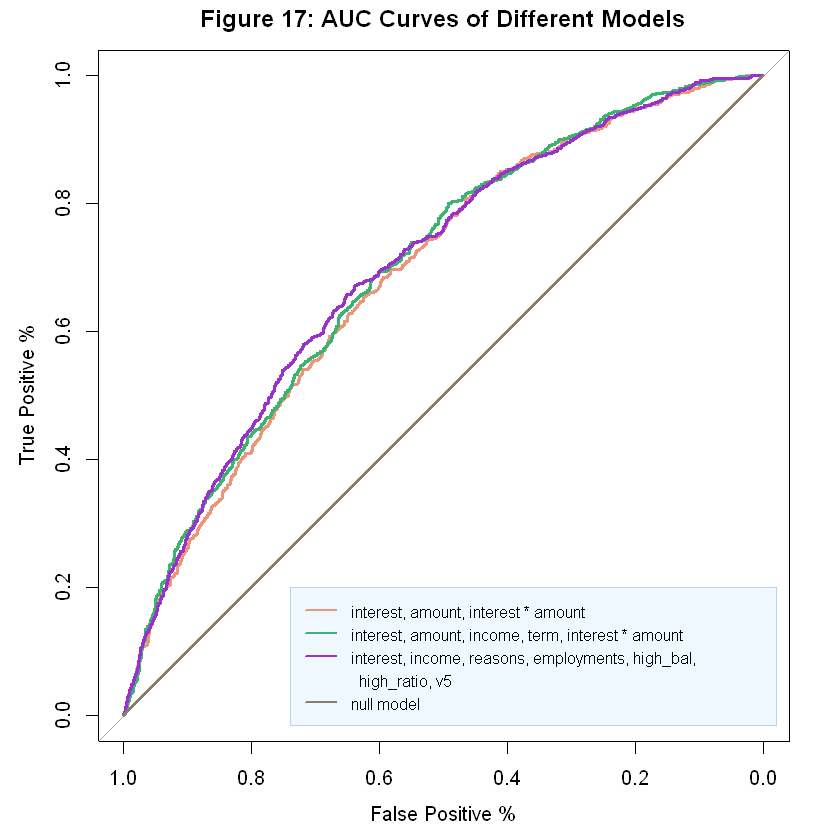

In [22]:
#install.packages("pROC")
library(pROC)
roc(loan$default, model_1$fitted.values, plot = T, xlab = "False Positive %", ylab = "True Positive %",
    col = "darksalmon", lwd = 3)
plot.roc(loan$default, model_4$fitted.values, add = T, col = "mediumseagreen", lwd = 3)
plot.roc(loan$default, model_6$fitted.values, add = T, col = "darkorchid", lwd = 3)

random_fitted.values = rep(mean(loan$default), 2840)
plot.roc(loan$default, random_fitted.values, add = T, col = "wheat4", lwd = 3)

legend(0.74, 0.2,
       legend = c("interest, amount, interest * amount",
#                  "interest, amount, income",
#                  "interest, amount, term, employment",
                  "interest, amount, income, term, interest * amount",
#                  "interest, amount, income, term, employments_1,",
#                  "  interest * amount",
                  "interest, income, reasons, employments, high_bal,",
                  "  high_ratio, v5",
                  "null model"),
       col = c("darksalmon", "mediumseagreen",
               "darkorchid", "aliceblue", "wheat4"),
       box.col = "lightsteelblue2", bg = "aliceblue", lty = 1:1, cex = 0.8, lwd = 2)

title(main = "Figure 17: AUC Curves of Different Models", line = 3)

In [19]:
summary(model_4)


Call:
glm(formula = default ~ amount * interest + term + income + amount + 
    interest, family = "binomial", data = loan)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9175  -0.8867  -0.6372   1.1358   2.2330  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)     -1.398e+00  3.510e-01  -3.982 6.84e-05 ***
amount          -4.156e-05  1.937e-05  -2.146  0.03191 *  
interest         1.327e-01  2.108e-02   6.293 3.12e-10 ***
term            -2.696e-01  5.533e-02  -4.873 1.10e-06 ***
income          -3.994e-06  1.218e-06  -3.278  0.00105 ** 
amount:interest  2.914e-06  1.196e-06   2.436  0.01486 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 3615.9  on 2839  degrees of freedom
Residual deviance: 3297.6  on 2834  degrees of freedom
AIC: 3309.6

Number of Fisher Scoring iterations: 4
